In [43]:

%env OMP_NUM_THREADS=1
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


env: OMP_NUM_THREADS=1


In [44]:
def plot_gaussian_mixture(clusterer, X, resolution=500, show_ylabels=True, marker_size=10):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, norm=LogNorm(vmin=1.0, vmax=50.0),
                 levels=np.logspace(0, 2, 12), cmap='Spectral')
    plt.contour(xx, yy, Z, norm=LogNorm(vmin=1.0, vmax=50.0),
                levels=np.logspace(0, 2, 12), linewidths=1, colors='k')
    Z_pred = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z_pred = Z_pred.reshape(xx.shape)
    plt.contour(xx, yy, Z_pred, linewidths=2, colors='white', linestyles='dashed')
    plt.plot(X[:, 0], X[:, 1], 'o', markersize=marker_size, color='gray', alpha=0.5)
    for i in range(len(clusterer.means_)):
        plt.plot(clusterer.means_[i][0], clusterer.means_[i][1], 'o', markersize=15,
                 markeredgecolor='black', markerfacecolor='yellow', label=f"Cluster {i} centroid")
    for i in range(len(clusterer.means_)):
        plt.text(clusterer.means_[i][0], clusterer.means_[i][1], f"Weight: {clusterer.weights_[i]:.2f}",
                 color='black', fontsize=14, ha='center', va='center')
    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0, fontsize=14)
    else:
        plt.tick_params(labelleft=False)
    plt.legend()
    plt.tight_layout()
    plt.show()

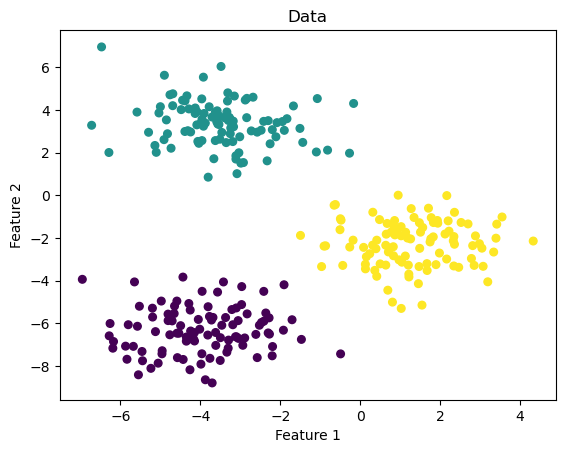

In [45]:
X, y = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=60)
noise_factor = 0.4
noise = np.random.randn(X.shape[0], X.shape[1]) * noise_factor
X = X + noise
model = GaussianMixture(n_components=3, n_init=10)
model.fit(X)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=30)
plt.title("Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [46]:
print( model.weights_)
print( model.means_)
print( model.covariances_)
print( model.converged_)
print( model.n_iter_)

[0.33301889 0.3333526  0.33362851]
[[-3.96534332 -6.33158456]
 [-3.49122214  3.36003888]
 [ 1.28306679 -2.29232619]]
[[[ 1.5064766   0.06427874]
  [ 0.06427874  1.16385474]]

 [[ 1.45538965 -0.26619015]
  [-0.26619015  1.09967033]]

 [[ 1.33683687  0.02519613]
  [ 0.02519613  1.16565117]]]
True
2


In [47]:
print(model.predict(X[:30]))
print(model.predict_proba(X[:30]).round(2))

[0 1 0 1 1 0 2 1 0 2 2 2 0 2 0 1 1 2 1 0 2 2 1 0 1 1 0 1 0 0]
[[1.   0.   0.  ]
 [0.   1.   0.  ]
 [0.99 0.   0.01]
 [0.   1.   0.  ]
 [0.   1.   0.  ]
 [1.   0.   0.  ]
 [0.   0.   1.  ]
 [0.   1.   0.  ]
 [1.   0.   0.  ]
 [0.01 0.   0.99]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [1.   0.   0.  ]
 [0.   0.   1.  ]
 [1.   0.   0.  ]
 [0.   1.   0.  ]
 [0.   1.   0.  ]
 [0.   0.   1.  ]
 [0.   1.   0.  ]
 [1.   0.   0.  ]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.   1.   0.  ]
 [1.   0.   0.  ]
 [0.   1.   0.  ]
 [0.   1.   0.  ]
 [1.   0.   0.  ]
 [0.   1.   0.  ]
 [1.   0.   0.  ]
 [1.   0.   0.  ]]


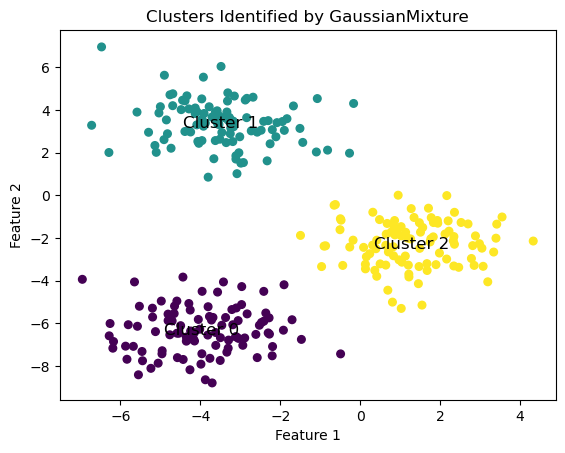

In [48]:
y_pred = model.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', s=30)

for i in range(3): 
    plt.text(X[y_pred == i, 0].mean(), X[y_pred == i, 1].mean(),
             f"Cluster {i}", color='black', fontsize=12, ha='center', va='center')

plt.title("Clusters Identified by GaussianMixture")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [49]:
X_new, y_new = model.sample(5)
print(X_new)
print(y_new)

[[-3.08796317 -6.83339743]
 [-4.55863418 -7.57009557]
 [-2.3714062   2.16986332]
 [ 0.69601295 -2.51158613]
 [ 0.53418679 -0.21331466]]
[0 0 1 2 2]


In [50]:
print(model.score_samples(X[:20]).round(2))
print(np.exp(model.score_samples(X[:20]).round(2)))

[-3.67 -3.15 -5.34 -3.23 -4.41 -4.19 -4.89 -3.35 -4.24 -7.05 -3.71 -3.18
 -3.92 -3.32 -3.3  -3.51 -3.48 -3.57 -3.18 -3.5 ]
[0.02547647 0.04285213 0.00479587 0.0395575  0.01215518 0.01514628
 0.00752142 0.03508435 0.01440759 0.00086741 0.02447752 0.04158566
 0.01984109 0.03615283 0.03688317 0.02989691 0.03080741 0.02815585
 0.04158566 0.03019738]


In [51]:
resolution = 100
grid = np.arange(-10, 10, 1 / resolution)
xx, yy = np.meshgrid(grid, grid)
X_full = np.vstack([xx.ravel(), yy.ravel()]).T

pdf = np.exp(model.score_samples(X_full))
pdf_probas = pdf * (1 / resolution) ** 2
print(pdf_probas.sum())

0.9998896921010321


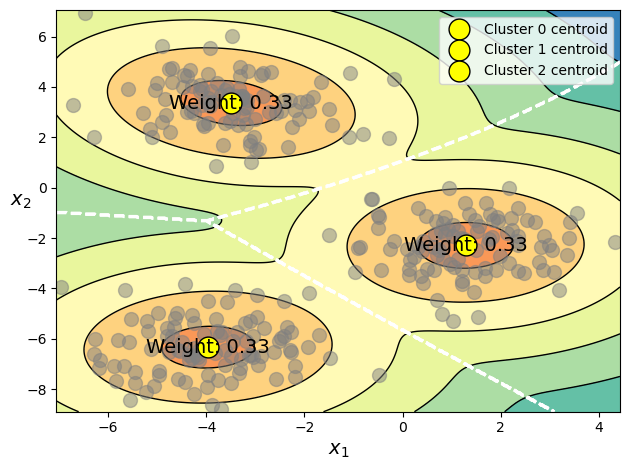

In [52]:
plot_gaussian_mixture(model, X)

Gaussian Mixture with covariance_type = 'full'


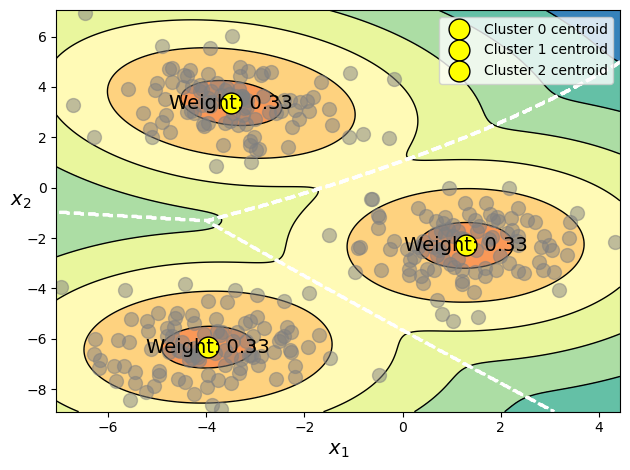

In [53]:
model = GaussianMixture(n_components=3, covariance_type='full', random_state=60)
model.fit(X)


print("Gaussian Mixture with covariance_type = 'full'")
plot_gaussian_mixture(model, X)



Gaussian Mixture with covariance_type = 'tied'


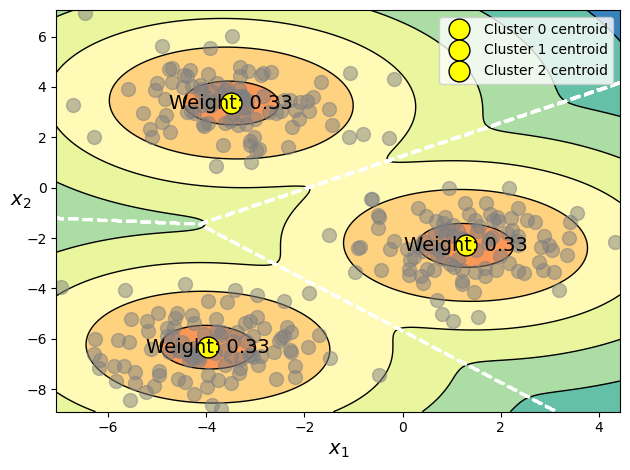

In [54]:
model = GaussianMixture(n_components=3, covariance_type='tied', random_state=60)
model.fit(X)

print("Gaussian Mixture with covariance_type = 'tied'")
plot_gaussian_mixture(model, X)



Gaussian Mixture with covariance_type = 'diag'


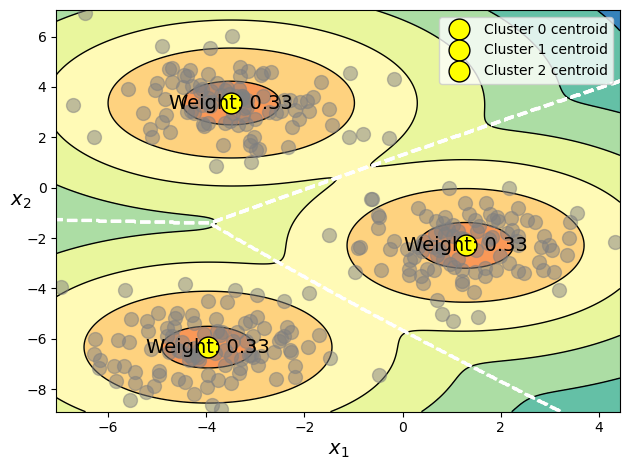

In [55]:
model = GaussianMixture(n_components=3, covariance_type='diag', random_state=60)
model.fit(X)

print("Gaussian Mixture with covariance_type = 'diag'")
plot_gaussian_mixture(model, X)


Gaussian Mixture with covariance_type = 'spherical'


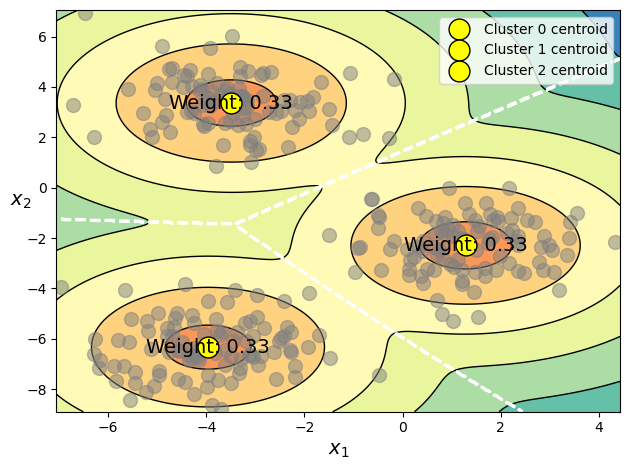

In [56]:
model = GaussianMixture(n_components=3, covariance_type='spherical', random_state=60)
model.fit(X)

print("Gaussian Mixture with covariance_type = 'spherical'")
plot_gaussian_mixture(model, X)

